Let's see how natural language statistics work on real data. We construct a vocabulary based on the time machine data and print the top words.

In [1]:
import d2l
import torch
import random
import utils

In [2]:
tokens = utils.tokenize(utils.read_time_machine())
vocab = utils.Vocab(tokens)
print(vocab.token_freqs[:10])

[('the', 2261), ('', 1282), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443)]


As we can see, the most popular words are actually quite boring to look at. They are often referred to as ``stop words`` and thus filtered out. That said, they still carry meaning and we will use them nonetheless. However, one thins that is quite clear is that the word frequency decays rather rapidly. The 10th word is less than 1/5 common as the most popular one. To get a better idea we plot the graph of word frequencies.

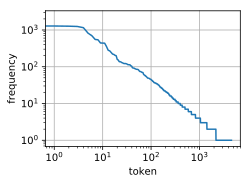

In [4]:
freqs = [freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token', ylabel='frequency',
        xscale='log', yscale='log')

What about word pairs?

In [5]:
bigram_tokens = [[pair for pair in zip(line[:-1], line[1:])]
                 for line in tokens]
bigram_vocab = utils.Vocab(bigram_tokens)
print(bigram_vocab.token_freqs[:10])

[(('of', 'the'), 297), (('in', 'the'), 161), (('i', 'had'), 126), (('and', 'the'), 104), (('i', 'was'), 104), (('the', 'time'), 97), (('it', 'was'), 94), (('to', 'the'), 81), (('as', 'i'), 75), (('of', 'a'), 69)]


Out of the 10 most frequent word pairs, 9 are composed of stop words and only one is relevant to the actual book. Let's see the trigram tokens.

In [6]:
trigram_tokens = [[triple for triple in 
                   zip(line[:-2], line[1:-1], line[2:])]
                 for line in tokens]
trigram_vocab = utils.Vocab(trigram_tokens)
print(trigram_vocab.token_freqs[:10])

[(('the', 'time', 'traveller'), 53), (('the', 'time', 'machine'), 24), (('the', 'medical', 'man'), 22), (('it', 'seemed', 'to'), 14), (('it', 'was', 'a'), 14), (('i', 'began', 'to'), 13), (('i', 'did', 'not'), 13), (('i', 'saw', 'the'), 13), (('here', 'and', 'there'), 12), (('i', 'could', 'see'), 12)]


Last, let's visualize the token frequencies among these three gram models.

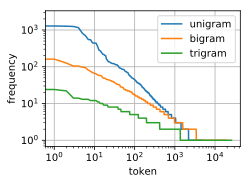

In [7]:
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token',
          ylabel='frequency', xscale='log', yscale='log',
          legend=['unigram', 'bigram', 'trigram'])